# Project description

Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more drivers during peak hours, we need to predict the amount of taxi orders for the next hour. Build a model for such a prediction.

The RMSE metric on the test set should not be more than 48.

## Project instructions

1. Download the data and resample it by one hour.
2. Analyze the data.
3. Train different models with different hyperparameters. The test sample should be 10% of the initial dataset. 
4. Test the data using the test sample and provide a conclusion.

## Data description

The data is stored in file `taxi.csv`. The number of orders is in the '*num_orders*' column.

## Preparation

In [1]:
import pandas as pd

data = pd.read_csv('taxi.csv', parse_dates=[0], index_col=[0])

In [2]:
# initial data analysis
print(data.info())
display(data.describe())
display(data.head())

# data sorted by date index ascending, resampled by 1 hour, sum
data.sort_index(inplace=True)
data = data.resample('1h').sum()

# post processing analysis
print(data.info())
display(data.describe())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB
None


,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: h
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB
None


,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


**- During data resampling, we've gone from 10-minute intervals per observation, to 60-minute/1-hour intervals, totaling the amount of taxis ordered per hour.**

**- Our total number of observations has gone from 26,496 to 4,416, this checks out seeing as though we've essentially divided by 6, and (26,496 / 4,416) = 6.**

**- Our window of data stretches between (March 1, 2018 @ 00:00:00) to (August 31, 2018 @ 23:00:00). 5 months, 30 days, 23 hours.**

**- As expected our summary statistics have also changed dramatically with this 'observation compression', all values (mean,median, max) have all increased, with the minimum remaining 0.**

## Analysis

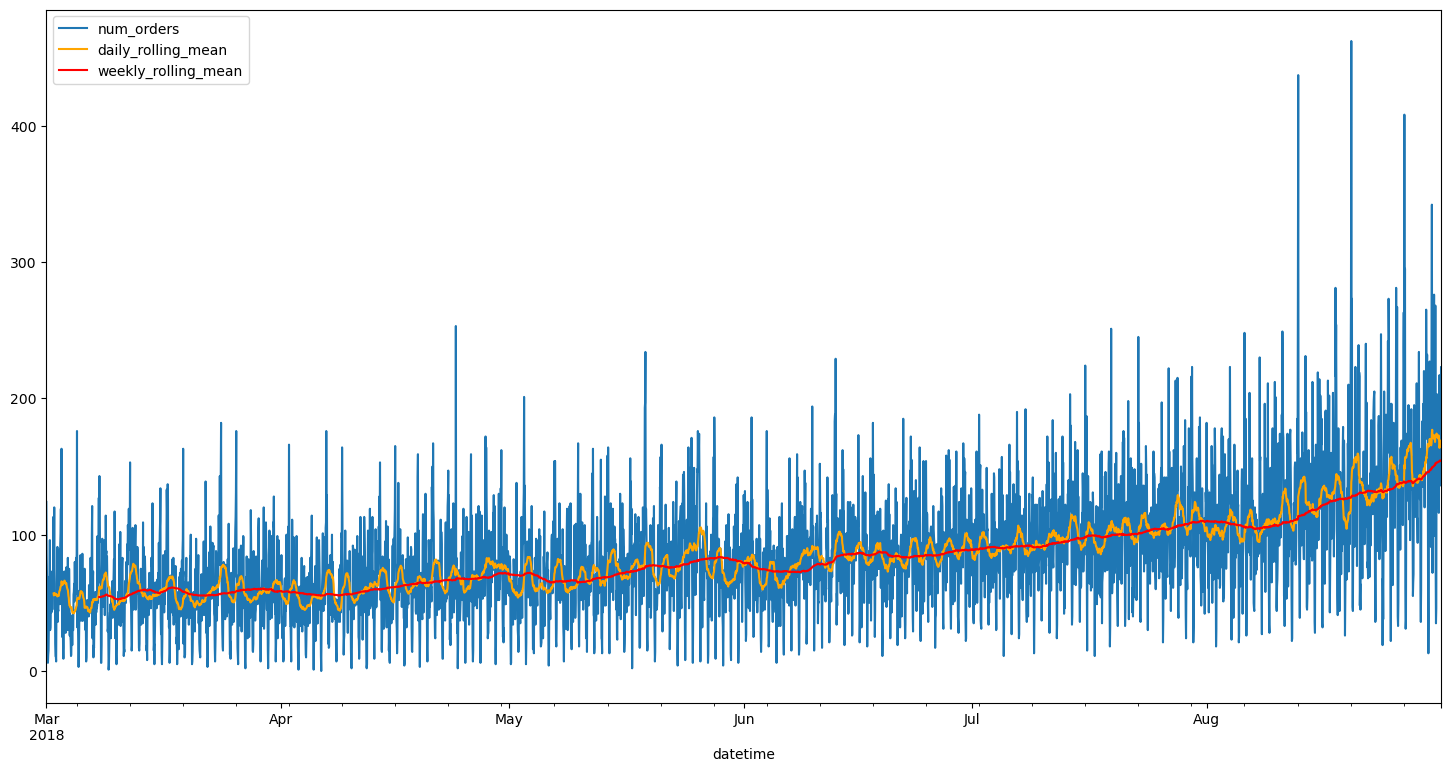

In [3]:
# capturing daily/weekly averages
data['daily_rolling_mean'] = data['num_orders'].rolling(24).mean()
data['weekly_rolling_mean'] = data['num_orders'].rolling(168).mean()

# plotting hourly totals, alongside daily & weekly averages
ax = data['num_orders'].plot(figsize=(18, 9))
data['daily_rolling_mean'].plot(ax=ax, color='orange')
data['weekly_rolling_mean'].plot(ax=ax, color='red')
ax.legend()

**- I've opted for both a 24-hour and 168-hour rolling mean, giving us the daily and weekly averages throughout our base hourly observational window. There is slightly positive trend in our data, with mid-late August seeing the largest increase in average orders.**

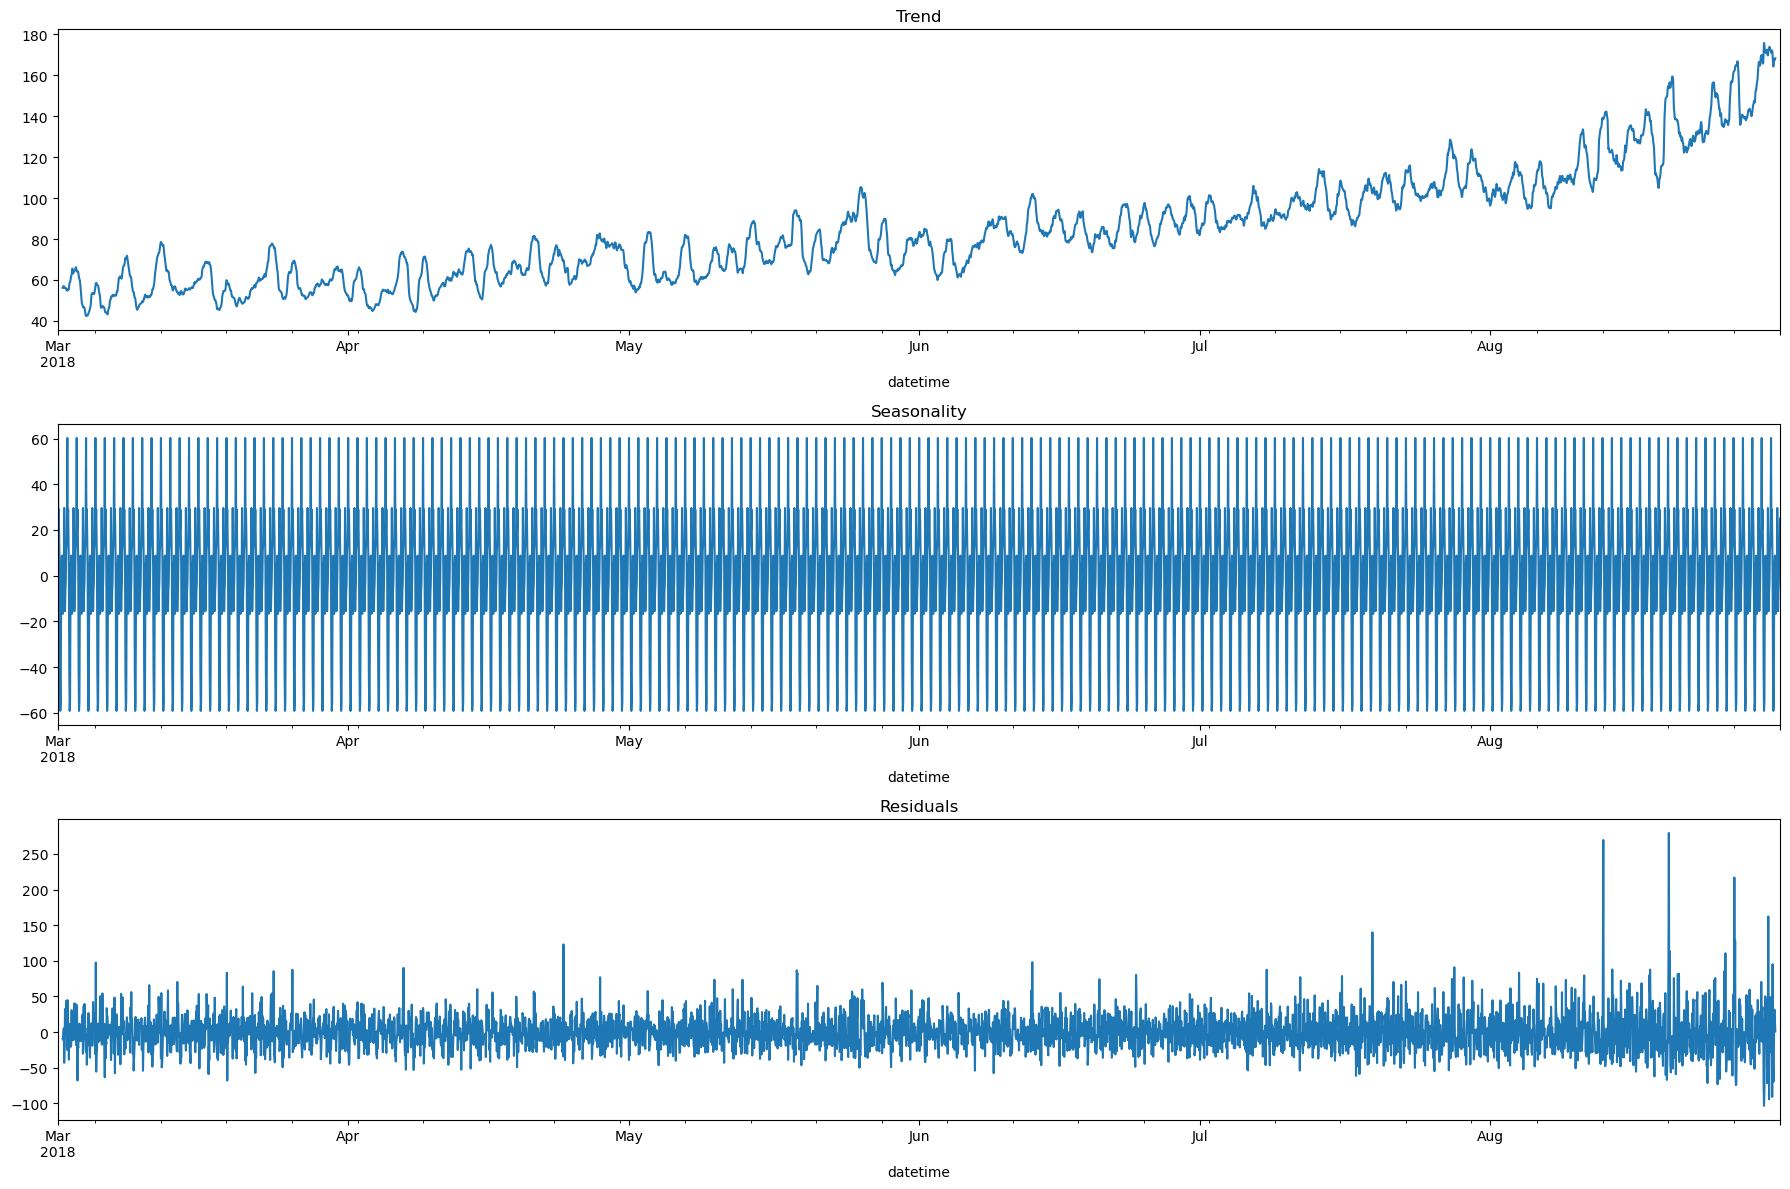

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

data = data.drop(['daily_rolling_mean', 'weekly_rolling_mean'], axis=1)
decomposed = seasonal_decompose(data)

plt.figure(figsize=(18, 12))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')

plt.tight_layout()

**- GENERATE SEASONALITY GRAPHS FOR JUNE-AUGUST**

## Training

## Testing

# Review checklist

- [x]  Jupyter Notebook is open
- [ ]  The code is error-free
- [ ]  The cells with the code have been arranged in order of execution
- [ ]  The data has been downloaded and prepared
- [ ]  The data has been analyzed
- [ ]  The model has been trained and hyperparameters have been selected
- [ ]  The models have been evaluated. Conclusion has been provided
- [ ] *RMSE* for the test set is not more than 48